In [1]:
import tensorflow as tf

from tensorflow import keras

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [9]:
#  https://raw.githubusercontent.com/Apress/artificial-neural-networks-with-tensorflow-2/main/ch02/Churn_Modelling.csv
data=pd.read_csv("Chun_Modelling.csv")

In [10]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
data = shuffle(data)

In [12]:
x = data.drop(labels=['CustomerId', 'Surname', 'RowNumber', 'Exited'], axis=1)
y = data['Exited']

In [13]:
x.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [14]:
label = LabelEncoder()

x['Geography'] = label.fit_transform(x['Geography'])
x['Gender'] = label.fit_transform(x['Gender'])

x = pd.get_dummies(x, drop_first=True, columns=['Geography'])

x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
6008,767,0,24,5,0.00,2,1,1,67445.85,0,1
8870,668,1,42,8,187534.79,1,1,1,32900.41,0,0
9672,613,1,28,7,76656.40,2,1,1,185483.24,1,0
7961,809,0,38,2,154763.21,2,1,1,174800.31,0,0
800,605,1,52,7,0.00,2,1,1,173952.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...
492,639,0,38,4,81550.94,2,0,1,118974.77,0,0
8142,615,1,41,4,130385.82,1,0,1,130661.95,0,0
1029,609,1,53,10,0.00,1,1,1,154642.91,0,1
3212,611,1,35,10,0.00,1,1,1,23598.23,0,0


In [15]:
scaler = StandardScaler()

x = scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [16]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(128, activation='relu', input_dim=X_train.shape[1]))

model.add(keras.layers.Dense(64, activation='relu'))

model.add(keras.layers.Dense(32, activation='relu'))

model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1536      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,905
Trainable params: 11,905
Non-trainable params: 0
_________________________________________________________________


2022-02-25 17:00:49.132754: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
import datetime, os

logdir = os.path.join("log", datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

In [22]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [26]:
r = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/50
219/219 [==============================] - 1s 2ms/step - loss: 0.4236 - accuracy: 0.8220 - val_loss: 0.3608 - val_accuracy: 0.8570
Epoch 2/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3485 - accuracy: 0.8557 - val_loss: 0.3497 - val_accuracy: 0.8563
Epoch 3/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.8606 - val_loss: 0.3498 - val_accuracy: 0.8620
Epoch 4/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3319 - accuracy: 0.8620 - val_loss: 0.3446 - val_accuracy: 0.8607
Epoch 5/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3275 - accuracy: 0.8644 - val_loss: 0.3422 - val_accuracy: 0.8637
Epoch 6/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3229 - accuracy: 0.8657 - val_loss: 0.3404 - val_accuracy: 0.8643
Epoch 7/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3213 - accuracy: 0.8670 - val_loss: 0.3418 - val_accuracy: 0.8630
Epoch 

In [28]:
%tensorboard --logdir log

Launching TensorBoard...

In [29]:
test_scores = model.evaluate(X_test, y_test)

94/94 [==============================] - 0s 735us/step - loss: 0.5307 - accuracy: 0.8183


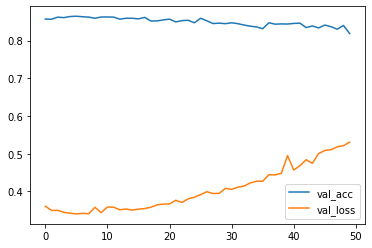

In [30]:
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [38]:
y_pred = model.predict(X_test)

import numpy as np

y_pred = np.where(y_pred > 0.5, 1,0)

In [39]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred)

In [40]:
cf

array([[2099,  283],
       [ 262,  356]])

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

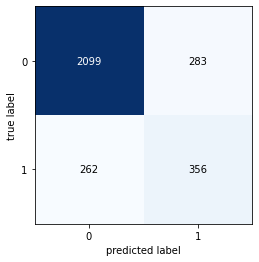

In [44]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(conf_mat=cf, cmap=plt.cm.get_cmap("Blues"))

In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8183333333333334

In [46]:
customer = model.predict([[
    615, 1, 22, 5, 20000, 5, 1, 1, 60000, 0, 0
]])

customer

array([[1.]], dtype=float32)

In [47]:
if customer[0] == 1:
    print ("Customer is likely to leave")
else:
    print ("Customer will stay")

Customer is likely to leave
